DEM exists:          True
Water-occurrence exists: True

DEM metadata:
 CRS:        EPSG:4326
 Bounds:     BoundingBox(left=80.0475, bottom=26.34333333333333, right=88.20833333333333, top=30.447499999999998)
 Resolution: (0.0008333333333333334, 0.0008333333333333334)
 Width × Hgt: 9793 × 4925
 Bands:      1
 Dtype:      ('int16',)

Water Occurrence metadata:
 CRS:        EPSG:4326
 Bounds:     BoundingBox(left=80.0, bottom=20.0, right=90.0, top=30.0)
 Resolution: (0.00025, 0.00025)
 Width × Hgt: 40000 × 40000
 Bands:      1
 Dtype:      ('uint8',)


<ipython-input-4-a601f5b12d48>:49: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  dem_clip, dem_transform = mask(src, [valley.unary_union], crop=True)
<ipython-input-4-a601f5b12d48>:57: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  water_clip, water_transform = mask(src, [valley.unary_union], crop=True)


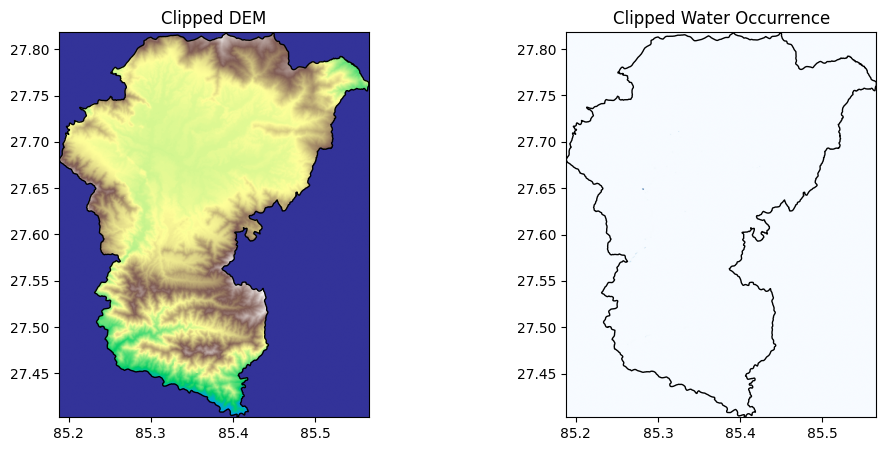

In [4]:
!pip install rasterio
!pip install geopandas
import rasterio
from pathlib import Path
import geopandas as gpd
import matplotlib.pyplot as plt
from rasterio.plot import show
from rasterio.mask import mask

# ─── 1. Point to your files ────────────────────────────────────
dem_path   = Path('/content/drive/MyDrive/Flood_Thesis/Data/static_data/'
                  'srtm-cgiar-nepal-boundary-dem-90m/'
                  'srtm_cgiar_nepal_boundary.img')
water_path = Path('/content/drive/MyDrive/Flood_Thesis/Data/static_data/'
                  'water_occurrence_Kathmandu.tif')
shp_path   = Path('/content/drive/MyDrive/Flood_Thesis/Data/'
                  'kathmandu valley border/kathmandu valley border.shp')

# ─── 2. Check that they exist ───────────────────────────────────
print("DEM exists:         ", dem_path.exists())
print("Water-occurrence exists:", water_path.exists())

# ─── 3. Inspect DEM metadata ────────────────────────────────────
with rasterio.open(dem_path) as dem:
    print("\nDEM metadata:")
    print(" CRS:       ", dem.crs)
    print(" Bounds:    ", dem.bounds)
    print(" Resolution:", dem.res)
    print(" Width × Hgt:", dem.width, "×", dem.height)
    print(" Bands:     ", dem.count)
    print(" Dtype:     ", dem.dtypes)

# ─── 4. Inspect Water Occurrence metadata ───────────────────────
with rasterio.open(water_path) as wo:
    print("\nWater Occurrence metadata:")
    print(" CRS:       ", wo.crs)
    print(" Bounds:    ", wo.bounds)
    print(" Resolution:", wo.res)
    print(" Width × Hgt:", wo.width, "×", wo.height)
    print(" Bands:     ", wo.count)
    print(" Dtype:     ", wo.dtypes)

# ─── 5. Quick plots clipped to Kathmandu Valley ─────────────────
# Load the boundary
valley = gpd.read_file(shp_path).to_crs(epsg=4326)

# Clip and plot DEM
with rasterio.open(dem_path) as src:
    dem_clip, dem_transform = mask(src, [valley.unary_union], crop=True)
fig, ax = plt.subplots(1,2, figsize=(12,5))
show(dem_clip[0], transform=dem_transform, ax=ax[0], cmap='terrain')
valley.boundary.plot(ax=ax[0], edgecolor='black', linewidth=1)
ax[0].set_title("Clipped DEM")

# Clip and plot Water Occurrence
with rasterio.open(water_path) as src:
    water_clip, water_transform = mask(src, [valley.unary_union], crop=True)
show(water_clip[0], transform=water_transform, ax=ax[1], cmap='Blues')
valley.boundary.plot(ax=ax[1], edgecolor='black', linewidth=1)
ax[1].set_title("Clipped Water Occurrence")

plt.show()


<ipython-input-7-a02f2b1780b0>:17: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  occ_raw, transform = mask(src, [valley.unary_union], crop=True)


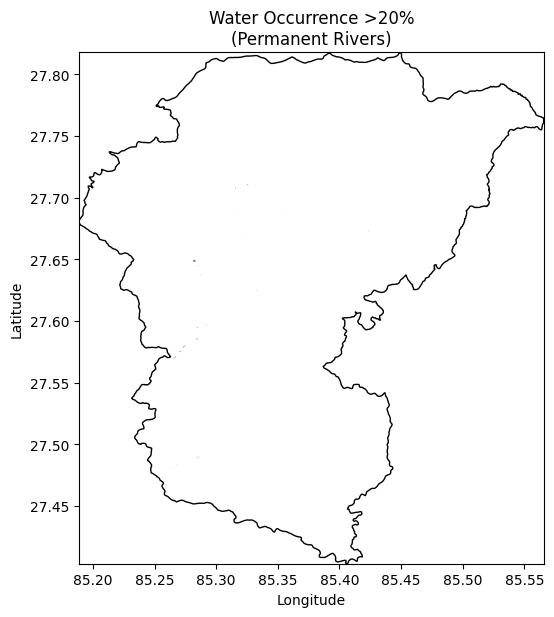

In [7]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# ─── Update these two paths to match your Drive ─────────────────────────
water_path = Path('/content/drive/MyDrive/Flood_Thesis/Data/static_data/'
                  'water_occurrence_Kathmandu.tif')
shp_path   = Path('/content/drive/MyDrive/Flood_Thesis/Data/'
                  'kathmandu valley border/kathmandu valley border.shp')

# ─── 1. Load & clip the water‐occurrence raster ─────────────────────────
valley = gpd.read_file(shp_path).to_crs(epsg=4326)  # force WGS84
with rasterio.open(water_path) as src:
    occ_raw, transform = mask(src, [valley.unary_union], crop=True)
    occ = occ_raw[0]  # 2D percent‐occurrence array

# ─── 2. Threshold at >20% ───────────────────────────────────────────────
threshold = 20
mask20 = occ > threshold

# ─── 3. Plot only the >20% pixels over the valley ──────────────────────
fig, ax = plt.subplots(figsize=(6, 8))
valley.boundary.plot(ax=ax, edgecolor='black', linewidth=1)

# Make everything below threshold transparent
cmap = plt.cm.Blues
cmap.set_under(alpha=0)

ax.imshow(
    np.where(mask20, occ, np.nan),
    cmap=cmap,
    vmin=threshold, vmax=100,
    extent=(
        transform[2],
        transform[2] + transform[0] * occ.shape[1],
        transform[5] + transform[4] * occ.shape[0],
        transform[5]
    )
)

ax.set_title(f"Water Occurrence >{threshold}%\n(Permanent Rivers)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()


<ipython-input-8-45acf74d62fc>:15: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  occ_raw, transform = mask(src, [valley.unary_union], crop=True)


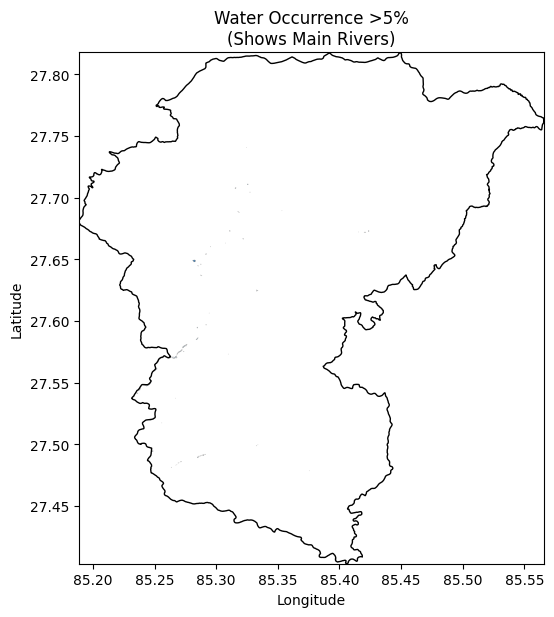

In [8]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Paths (adjust if yours differ)
water_path = Path('/content/drive/MyDrive/Flood_Thesis/Data/static_data/water_occurrence_Kathmandu.tif')
shp_path   = Path('/content/drive/MyDrive/Flood_Thesis/Data/kathmandu valley border/kathmandu valley border.shp')

# 1) Load & clip water-occurrence to the valley
valley = gpd.read_file(shp_path).to_crs(epsg=4326)
with rasterio.open(water_path) as src:
    occ_raw, transform = mask(src, [valley.unary_union], crop=True)
    occ = occ_raw[0]  # 2D array of percent values

# 2) Threshold at >5%
threshold = 5
river_mask = occ > threshold

# 3) Plot
fig, ax = plt.subplots(1, 1, figsize=(6, 8))
valley.boundary.plot(ax=ax, edgecolor='black', linewidth=1)

# Use a transparent colormap so only >5% shows
cmap = plt.cm.Blues
cmap.set_under(alpha=0)

ax.imshow(
    np.where(river_mask, occ, np.nan),
    cmap=cmap,
    vmin=threshold, vmax=100,
    extent=(
        transform[2],
        transform[2] + transform[0] * occ.shape[1],
        transform[5] + transform[4] * occ.shape[0],
        transform[5]
    )
)

ax.set_title(f"Water Occurrence >{threshold}%\n(Shows Main Rivers)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()


<ipython-input-9-79e47b6a8077>:19: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  occ_raw, transform = mask(src, [valley.unary_union], crop=True)


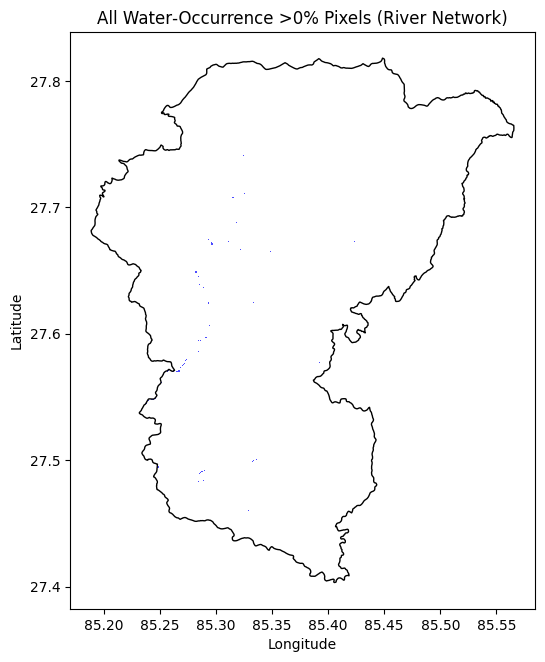

In [9]:
import rasterio
from rasterio.mask import mask
from rasterio.features import shapes
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import shape
from pathlib import Path

# ─── Paths ───────────────────────────────────────────────────────────────
water_path = Path('/content/drive/MyDrive/Flood_Thesis/Data/static_data/'
                  'water_occurrence_Kathmandu.tif')
shp_path   = Path('/content/drive/MyDrive/Flood_Thesis/Data/'
                  'kathmandu valley border/kathmandu valley border.shp')

# ─── 1. Clip the water occurrence raster to the valley ───────────────────
valley = gpd.read_file(shp_path).to_crs(epsg=4326)
with rasterio.open(water_path) as src:
    occ_raw, transform = mask(src, [valley.unary_union], crop=True)
    occ = occ_raw[0]  # 2D percent-occurrence

# ─── 2. Create a binary mask of any water (occ > 0%) ─────────────────────
mask_any = occ > 0

# ─── 3. Vectorize those masked pixels ────────────────────────────────────
shapes_gen = shapes(mask_any.astype('uint8'), mask=mask_any, transform=transform)
geoms = []
for geom, val in shapes_gen:
    if val == 1:
        geoms.append(shape(geom))

rivers_gdf = gpd.GeoDataFrame(geometry=geoms, crs='EPSG:4326')
# Optional: simplify the geometry to speed up plotting
rivers_gdf['geometry'] = rivers_gdf.geometry.simplify(0.00005)

# ─── 4. Plot boundary + rivers ───────────────────────────────────────────
fig, ax = plt.subplots(figsize=(6, 8))
valley.boundary.plot(ax=ax, edgecolor='black', linewidth=1)
rivers_gdf.plot(ax=ax, color='blue', linewidth=0.5, alpha=0.7)

ax.set_title("All Water‐Occurrence >0% Pixels (River Network)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-10-ebb1d564594e>:18: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  occ_clip, transform = mask(src, [valley.unary_union], crop=True)


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

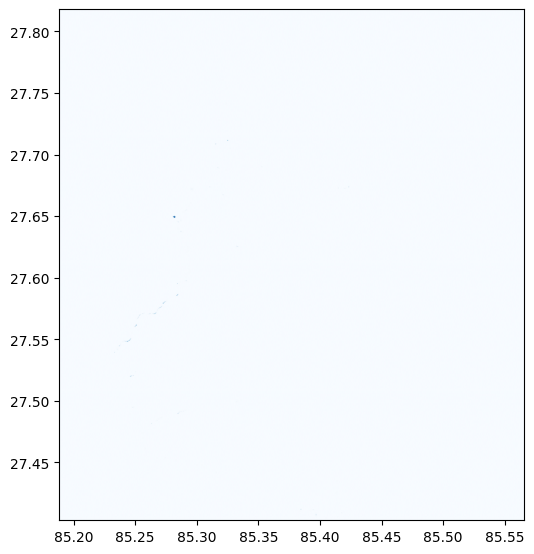

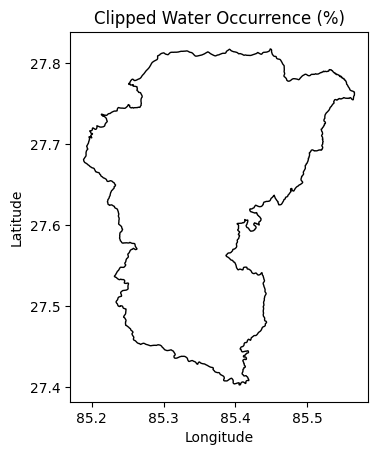

In [10]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path



tif_path = Path('/content/drive/MyDrive/Flood_Thesis/Data/static_data/occurrence_kathmandu.tif')
shp_path = Path('/content/drive/MyDrive/Flood_Thesis/Data/'
                'kathmandu valley border/kathmandu valley border.shp')

# 2. Load and clip (just to verify)
valley = gpd.read_file(shp_path).to_crs(epsg=4326)
with rasterio.open(tif_path) as src:
    occ_clip, transform = mask(src, [valley.unary_union], crop=True)

# 3. Plot the clipped occurrence
plt.figure(figsize=(6, 8))
plt.imshow(
    occ_clip[0],
    vmin=0, vmax=100,
    cmap='Blues',
    extent=(
        transform[2],
        transform[2] + transform[0] * occ_clip.shape[2],
        transform[5] + transform[4] * occ_clip.shape[1],
        transform[5]
    )
)
valley.boundary.plot(edgecolor='black', linewidth=1)
plt.title("Clipped Water Occurrence (%)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label='Occurrence %')
plt.show()
